<a href="https://colab.research.google.com/github/sathamhussain7/task-6/blob/main/boston_houseprice_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries

In [2]:
import pandas as pd
import numpy as np


load data

In [8]:
df1=pd.read_csv('/content/boston_train.csv')
df2=pd.read_csv('/content/boston_test.csv')

In [7]:
df1.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8


In [9]:
df2.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,394.62,12.40
1,1,0.34109,0.0,7.38,0,0.493,6.415,40.1,4.7211,5,287.0,19.6,396.90,6.12
2,2,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69
3,3,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45
4,4,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403.0,14.7,227.61,12.14


In [ ]:
df1.shape,df2.shape

((400, 15), (105, 14))

In [ ]:
df1.isnull().sum()

ID         0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
df1.duplicated().sum()

0

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       400 non-null    int64  
 1   CRIM     400 non-null    float64
 2   ZN       400 non-null    float64
 3   INDUS    400 non-null    float64
 4   CHAS     400 non-null    int64  
 5   NOX      400 non-null    float64
 6   RM       400 non-null    float64
 7   AGE      400 non-null    float64
 8   DIS      400 non-null    float64
 9   RAD      400 non-null    int64  
 10  TAX      400 non-null    float64
 11  PTRATIO  400 non-null    float64
 12  B        400 non-null    float64
 13  LSTAT    400 non-null    float64
 14  MEDV     400 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 47.0 KB


In [11]:
corr=df1.corr()
corr

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
ID,1.000000,-0.009895,-0.037340,0.005167,-0.034274,-0.034631,0.061728,-0.031016,0.010385,-0.031669,-0.007460,0.056734,-0.030764,-0.019382,0.006956
CRIM,-0.009895,1.000000,-0.193548,0.409972,-0.060591,0.422635,-0.205928,0.353379,-0.376323,0.618538,0.577501,0.284967,-0.357581,0.442743,-0.393693
ZN,-0.037340,-0.193548,1.000000,-0.522218,-0.037318,-0.497638,0.290127,-0.554214,0.659949,-0.301067,-0.300221,-0.369974,0.161515,-0.402116,0.336805
INDUS,0.005167,0.409972,-0.522218,1.000000,0.075305,0.759132,-0.396865,0.631742,-0.695199,0.608088,0.731619,0.370383,-0.338007,0.624374,-0.502898
CHAS,-0.034274,-0.060591,-0.037318,0.075305,1.000000,0.084020,0.091267,0.083314,-0.102016,-0.023792,-0.045183,-0.137556,0.040732,-0.055326,0.182096
NOX,-0.034631,0.422635,-0.497638,0.759132,0.084020,1.000000,-0.283907,0.736349,-0.768775,0.602960,0.657875,0.154693,-0.382202,0.622209,-0.434271
RM,0.061728,-0.205928,0.290127,-0.396865,0.091267,-0.283907,1.000000,-0.198918,0.171596,-0.190030,-0.277064,-0.336408,0.120518,-0.634758,0.721489
AGE,-0.031016,0.353379,-0.554214,0.631742,0.083314,0.736349,-0.198918,1.000000,-0.750408,0.457339,0.499478,0.234894,-0.274650,0.593788,-0.354106
DIS,0.010385,-0.376323,0.659949,-0.695199,-0.102016,-0.768775,0.171596,-0.750408,1.000000,-0.492090,-0.520442,-0.185938,0.274036,-0.503383,0.235087
RAD,-0.031669,0.618538,-0.301067,0.608088,-0.023792,0.602960,-0.190030,0.457339,-0.492090,1.000000,0.911103,0.458930,-0.395845,0.503532,-0.386922


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

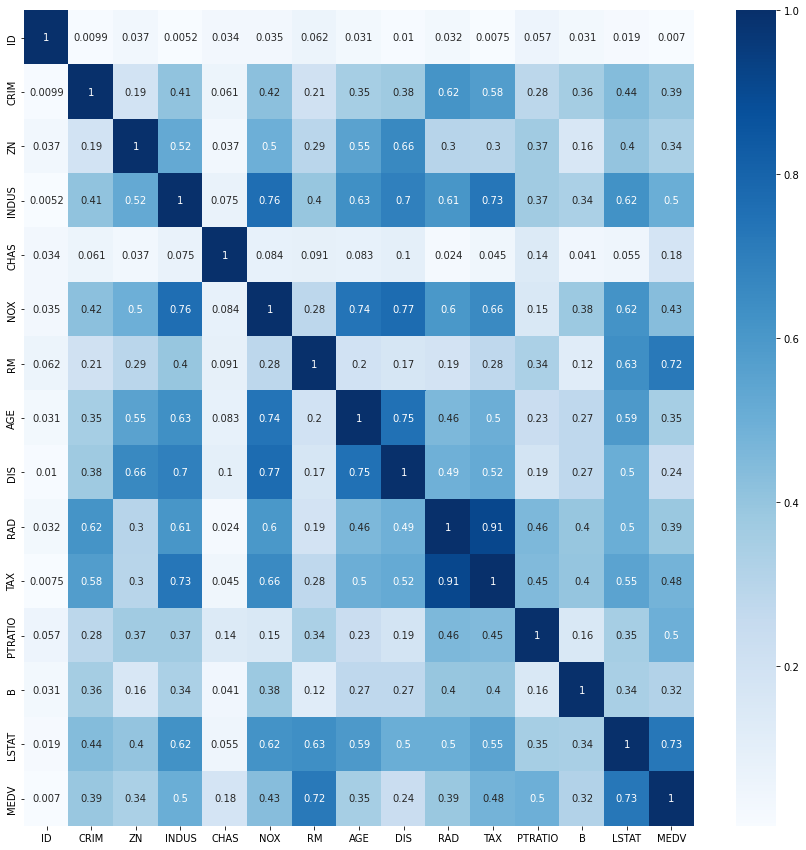

In [ ]:
#using a heatmap to see correlation between features more clearly.
plt.figure(figsize=(15,15))
sns.heatmap(corr.abs(), annot=True,cmap='Blues')

From the above figure, it is clear that INDUS, NOX, RM, TAX, PTRATIO, LSTAT are correlated (with value < 0.4) with MEDV(Price).

In [12]:
# Split the training data
train_y = df1['MEDV']
train_x = df1.drop('MEDV', axis = 1)

In [13]:
#Split the training data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size = 0.2, random_state = 10)

In [14]:
#Standarddize features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [15]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(x_train, y_train)

LinearRegression()

In [ ]:
lm.intercept_

27.368879883520734

In [16]:
coefficients = pd.DataFrame([train_x.columns,lm.coef_]).T
coefficients = coefficients.rename(columns={0: 'Attribute', 1: 'Coeff_LinReg'})
coefficients

,Attribute,Coeff_LinReg
0,ID,0.299626
1,CRIM,-13.244354
2,ZN,5.577593
3,INDUS,0.047677
4,CHAS,3.543189
5,NOX,-8.192706
6,RM,16.800633
7,AGE,0.004226
8,DIS,-15.991128
9,RAD,8.145365


In [17]:
from sklearn import metrics

In [34]:
y_pred_linreg = lm.predict(x_train)
y_pred_linreg

array([17.93155978,  2.33652089, 16.64521633, 27.17604093, 32.16193543,
       20.43197143, 18.07857799, 14.21422624, 20.93679792, 32.14847713,
       23.80900131, 32.62668461, 31.74427401, 14.26590908, 40.14913984,
       24.66194389, 34.06593345, 19.77460858, 20.47453795,  2.22617529,
       22.9325673 , 26.05266069, 41.31060129, 24.61957691, 21.46019771,
       32.65061845, 17.80188346, 36.72788035, 13.15347154, 27.23445982,
       21.22148195, 38.18057901, 20.34279226, 24.16414105, 28.20506728,
       22.2616659 , 24.02565898, 24.72345258, 23.24332051, 35.51644317,
       29.48760692, 33.97456652, 17.03722987, 14.71891267, 39.85694422,
       30.50911833, 19.17397637, 30.0394969 , 19.44411069, 28.74751446,
       25.89368653, 20.28838543,  7.52894861, 23.14595643, 23.48288287,
       34.79395631, 22.97763816, 24.70890511, 20.52617263, 20.60383292,
       12.26894936, 12.06363196,  8.64749127, 21.98594746, 12.71119223,
       16.86082459,  6.64108656, 43.4516343 , 18.2148514 , 11.91

In [35]:
r2_linreg=metrics.r2_score(y_train, y_pred_linreg)
r2_linreg

0.7292219911372129

ridge regression

In [20]:
# importing ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha=.99)
ridgeR.fit(x_train,y_train)

Ridge(alpha=0.99)

In [21]:
print("intercept = ", ridgeR.intercept_)

intercept =  26.301841019372482


In [22]:
coeff_ridge = pd.DataFrame([train_x.columns,ridgeR.coef_]).T
coeff_ridge = coeff_ridge.rename(columns={0: 'Attribute',1: 'Coeff_ridge'})
coeff_ridge


,Attribute,Coeff_ridge
0,ID,0.295336
1,CRIM,-8.350915
2,ZN,4.220953
3,INDUS,-0.8835
4,CHAS,3.951935
5,NOX,-6.088132
6,RM,15.931015
7,AGE,-0.042264
8,DIS,-11.924339
9,RAD,5.910749


In [36]:
y_pred_ridge = ridgeR.predict(x_train)
y_pred_ridge

array([17.58427947,  2.8440738 , 15.99855513, 27.01349318, 32.04045494,
       20.69631439, 18.25615533, 14.81241406, 21.58005625, 31.58367918,
       24.58581649, 32.36289727, 31.36306346, 14.09294758, 38.96592087,
       25.071964  , 33.43636044, 19.35801883, 20.47803878,  2.82490116,
       22.74359801, 26.88203611, 40.76101368, 24.69062495, 21.71769307,
       32.42540316, 17.17818295, 35.87780336, 13.09149418, 27.07700577,
       21.89409255, 37.16196039, 20.32623666, 23.98654529, 27.173765  ,
       21.96270023, 24.35308683, 24.98956791, 23.1755716 , 34.66490353,
       29.56436335, 33.02041899, 17.55567431, 16.48743179, 39.35786755,
       29.5409882 , 19.67966581, 29.59299476, 19.73008678, 27.64117349,
       25.87291133, 20.98342552,  7.92642754, 23.0813776 , 22.38265117,
       33.74529248, 22.8362632 , 24.4611355 , 19.61500355, 21.19817024,
       12.92169019, 12.81745315,  9.05435863, 22.49517358, 13.78655367,
       16.07633422,  7.52828324, 41.49603159, 17.81672052, 11.83

In [37]:
r2_ridge=metrics.r2_score(y_train, y_pred_ridge)
r2_ridge

0.7234733458881469

lasso regression

In [25]:
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha = .05)
lasso.fit(x_train,y_train)

Lasso(alpha=0.05)

In [26]:
# intercepts
print("intercept = ", lasso.intercept_)

intercept =  24.97872180428688


In [27]:
#Converting the coefficient values to a dataframe
coeff_lasso = pd.DataFrame([train_x.columns,lasso.coef_]).T
coeff_lasso = coeff_lasso.rename(columns={0: 'Attribute',1: 'Coeff_lasso'})
coeff_lasso

,Attribute,Coeff_lasso
0,ID,0.0
1,CRIM,-2.30895
2,ZN,2.259557
3,INDUS,-0.0
4,CHAS,3.591891
5,NOX,-4.253882
6,RM,17.506891
7,AGE,-0.0
8,DIS,-7.791828
9,RAD,2.350113


In [28]:
y_pred_lasso = lasso.predict(x_train)
y_pred_lasso

array([16.8658811 ,  2.38254172, 15.13108628, 27.15852373, 31.32956036,
       20.53551802, 18.05633311, 14.86182317, 21.48350977, 31.08131879,
       25.40488828, 31.51797639, 30.69132487, 14.41018359, 38.59668065,
       25.74582433, 32.77402206, 19.03865957, 20.36866185,  1.38464859,
       23.3421522 , 27.26986363, 41.6947901 , 24.58320269, 21.34775998,
       32.52819182, 17.23019732, 35.35182831, 13.336539  , 26.64278594,
       22.60281236, 36.73090499, 20.26602813, 24.51206275, 26.93830941,
       22.15497443, 24.34929832, 25.37754491, 23.38288006, 33.91504856,
       29.1398386 , 32.72194787, 17.82090328, 18.00363243, 40.28223108,
       28.3444348 , 20.06534332, 29.37563651, 19.66701714, 27.0233114 ,
       24.9169539 , 21.14543195,  6.9770909 , 23.14845517, 21.2980271 ,
       32.9264613 , 23.09903359, 24.65599756, 19.33395972, 21.44413854,
       12.94222249, 12.82996621,  8.08290078, 22.60994397, 14.42460542,
       15.44175137,  7.23558189, 39.72658284, 17.60238165, 10.91

In [29]:
r2_lasso=metrics.r2_score(y_train, y_pred_lasso)
r2_lasso

0.7070667785406617

In [38]:
mod_eval = pd.DataFrame([r2_linreg,r2_ridge,r2_lasso]).T
mod_eval = mod_eval.rename(columns={0: 'LinReg', 1: 'RidgeReg', 2: 'Lasso'})
mod_eval.set_axis(['R^2'], axis = 0)

,LinReg,RidgeReg,Lasso
R^2,0.729222,0.723473,0.707067
